In [46]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import os
warnings.filterwarnings(action='ignore')

In [47]:
class_list = ['airplane', 'bell', 'car_horn', 'cat', 'chirping_birds', 
              'clapping', 'crying_baby', 'dog_bark', 'drum', 'guitar', 'gun_shot', 
              'laughing','lion','piano','rain','scream','siren','snoring','thunderstorm',
              'vacuum_cleaner'] 

audio_duration = []
audio = []
label = []


for i in range (len(class_list)):
    audio_duration.append([])

try:
    for i in range(len(class_list)):
        dir_path = './sound data/Audio Dataset_join 2sec/' 
        dir_path = dir_path + class_list[i]

        for (root, directories, files) in os.walk(dir_path):
            for file in files:
                if '.wav' in file or '.mp3' in file:
                    file_path = os.path.join(root, file)
                    y, sr = librosa.load(file_path, duration=2) 
                    # y = librosa.resample(y, sr, )
                    duration = librosa.get_duration(y, sr=sr)
                    audio_duration[i].append(duration)
                    audio.append(y)
                    label.append(i)
except:
    print(file_path)

print(audio[:2])
print(label[:10])

[array([-0.00569035, -0.0106697 , -0.00719548, ..., -0.02031892,
       -0.02075043, -0.01899269], dtype=float32), array([0.02236277, 0.066851  , 0.0805847 , ..., 0.22747907, 0.24807322,
       0.2316495 ], dtype=float32)]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [48]:
print(len(audio[0]))

44100


In [49]:
for i in audio:
    if len(i) != 44100:
        print(len(i))

44073
43889
43990


In [50]:
for i, j in enumerate(audio):
    if len(j) != 44100:
        del audio[i]
        del label[i]

print(len(audio))
print(len(label))

4081
4081


In [51]:
set_duration = []
for i in range(len(audio_duration)):
    duration = set(audio_duration[i])
    set_duration.append(duration)
print(set_duration)

[{2.0}, {2.0}, {2.0}, {2.0}, {2.0}, {2.0}, {2.0}, {1.9987755102040816, 2.0}, {2.0}, {2.0}, {1.9904308390022676, 2.0, 1.9950113378684806}, {2.0}, {2.0}, {2.0}, {2.0}, {2.0}, {2.0}, {2.0}, {2.0}, {2.0}]


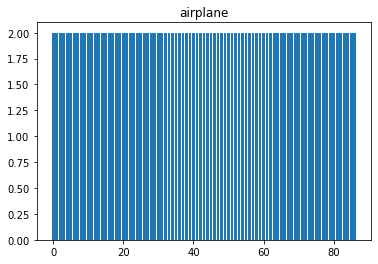

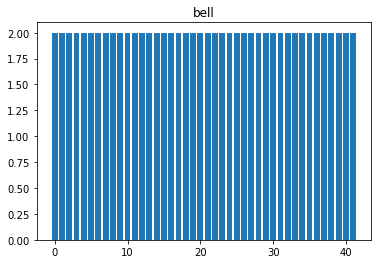

In [52]:
for i in range(len(audio_duration[0:2])):
    num = len(audio_duration[i])
    x = np.arange(num)

    plt.bar(x, audio_duration[i])
    plt.title(class_list[i])


    plt.show()

In [53]:
for i in range(len(audio_duration[0:2])):
    # print('max_duration: ', max(audio_duration[i]))
    # print('min_duration: ', min(audio_duration[i]))
    try:
        print('num: ', class_list[i], len(audio_duration[i]), min(audio_duration[i]))
        
    except:
        pass
    

num:  airplane 87 2.0
num:  bell 42 2.0


In [54]:
array_c = []
for i in audio:
    array_c.append(len(i))

print(max(array_c))
print(min(array_c))


44100
44100


In [55]:
print(sr)

22050


In [56]:
print(len(audio[0]))

44100


In [57]:
audio_np = np.array(audio, np.float64)
rabel_np = np.array(label, np.int16)

print( audio_np.shape ,rabel_np.shape)

(4081, 44100) (4081,)


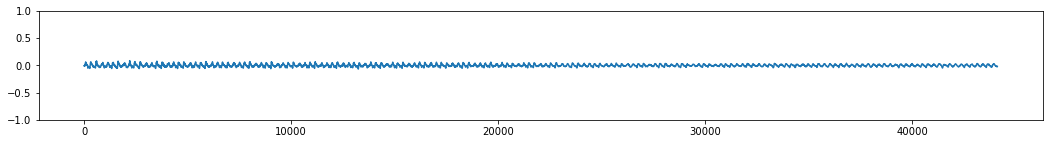

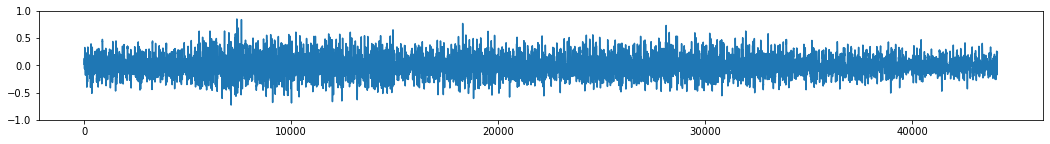

In [58]:
for idx in range(0, len(audio_np[1:3])):
    plt.figure(figsize=(18,2))
    plt.plot(audio_np[idx])
    plt.ylim((-1, 1))
    plt.show()

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(audio_np)

MinMaxScaler()

In [15]:
print(rabel_np)

[ 0  0  0 ... 19 19 19]


In [43]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(audio_np, rabel_np, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(3264, 44100)
(817, 44100)
(3264,)
(817,)


In [46]:
print(audio_np.shape, sr)

(4081, 44100) 22050


In [47]:
audio_stft = []
for y in audio_np:
  S = librosa.core.stft(y, n_fft=1024, hop_length=512, win_length=1024)
  D = np.abs(S)**2
  log_S = librosa.power_to_db(S, ref=np.max)
  audio_stft.append(log_S)

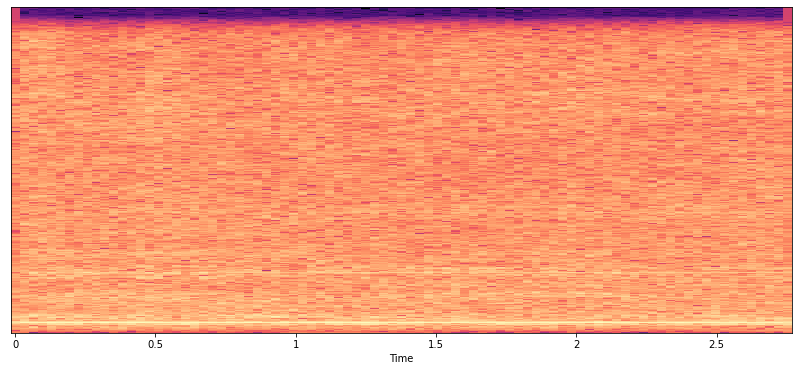

In [48]:
from IPython.core.pylabtools import figsize

plt.figure(figsize(14,6))
librosa.display.specshow(log_S, sr=16000, x_axis='time')

In [49]:
stft_np = np.array(audio_stft, np.float32)

print(stft_np.shape, rabel_np.shape)

(4081, 513, 87) (4081,)


In [50]:
stft_np = stft_np.reshape(4081, 513 * 87)

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(stft_np)

MinMaxScaler()

In [52]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(stft_np, rabel_np, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(3264, 44631)
(817, 44631)
(3264,)
(817,)


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.7099143206854345


In [54]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred =SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.7515299877600979


In [55]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.4969400244798042


----------

## DNN

In [56]:
print(audio_np.shape)

(4081, 44100)


In [57]:
from keras.utils import to_categorical

stft_np = np.array(audio_stft, np.float32)
stft_np = stft_np.reshape(4081, 513 * 87)
cqt_array = np.expand_dims(stft_np, -1)
inst_cat = to_categorical(rabel_np)

train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(3264, 44631, 1)
(817, 44631, 1)
(3264, 20)
(817, 20)


In [58]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

def model_build():
  model = Sequential()

  input = Input(shape=(44631,), name='input')
  output = Dense(512, activation='relu', name='hidden1')(input)
  output = Dense(256, activation='relu', name='hidden2')(output)
  output = Dense(128, activation='relu', name='hidden3')(output)
  output = Dense(20, activation='softmax', name='output')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=['acc'])
  return model

In [59]:
# record 
# layer = 3 - acc = 0.64
# layer = 4 - acc = 0.61
# layer = 5 - acc = 0.69

In [60]:
### test

from keras.models import Sequential, Model
from keras.layers import Input, Dense

def model_build():
  model = Sequential()

  input = Input(shape=(44631,), name='input')
  output = Dense(1024, activation='relu', name='hidden0')(input)
  output = Dense(512, activation='relu', name='hidden1')(output)
  output = Dense(256, activation='relu', name='hidden2')(output)
  output = Dense(128, activation='relu', name='hidden3')(output)
  output = Dense(20, activation='softmax', name='output')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=['acc'])
  return model

In [61]:
model = model_build()
model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-20 23:10:53.114449: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-20 23:10:53.115484: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 44631)]           0         
                                                                 
 hidden0 (Dense)             (None, 1024)              45703168  
                                                                 
 hidden1 (Dense)             (None, 512)               524800    
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 output (Dense)              (None, 20)                2580      
                                                                 
Total params: 46,394,772
Trainable params: 46,394,772
Non-tra

In [62]:
history = model.fit(train_x, train_y, epochs=30, batch_size = 128, validation_split=0.2)

Epoch 1/30


2022-07-20 23:10:55.798746: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-20 23:10:56.131805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - ETA: 0s - loss: 1672.4901 - acc: 0.1333

2022-07-20 23:11:01.684014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 6s 157ms/step - loss: 1672.4901 - acc: 0.1333 - val_loss: 1115.0930 - val_acc: 0.2894
Epoch 2/30
21/21 [==============================] - 2s 115ms/step - loss: 597.5822 - acc: 0.1704 - val_loss: 241.5473 - val_acc: 0.0490
Epoch 3/30
21/21 [==============================] - 2s 110ms/step - loss: 182.2507 - acc: 0.1735 - val_loss: 156.5491 - val_acc: 0.1026
Epoch 4/30
21/21 [==============================] - 2s 111ms/step - loss: 75.6340 - acc: 0.1842 - val_loss: 43.2459 - val_acc: 0.2894
Epoch 5/30
21/21 [==============================] - 2s 114ms/step - loss: 35.0509 - acc: 0.1789 - val_loss: 23.5693 - val_acc: 0.2910
Epoch 6/30
21/21 [==============================] - 2s 113ms/step - loss: 31.2407 - acc: 0.1926 - val_loss: 17.3869 - val_acc: 0.3109
Epoch 7/30
21/21 [==============================] - 3s 125ms/step - loss: 9.6005 - acc: 0.2620 - val_loss: 10.7578 - val_acc: 0.2925
Epoch 8/30
21/21 [==============================] - 3s 120ms/step 

In [29]:
def plot_history(history_dict):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(14,5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b--', label='train_loss')
    ax1.plot(epochs, val_loss, 'r:', label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    acc = history_dict['acc']
    val_acc = history_dict['val_acc']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(14,5))

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, acc, 'b--', label='train_accuracy')
    ax2.plot(epochs, val_acc, 'r:', label='val_accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.grid()
    ax2.legend()

    plt.show()

# val 높다는건 오버 피팅되었다는 거다. 
# acc 는 높게 나옴 학습은 잘됨 (단 오버피팅임)

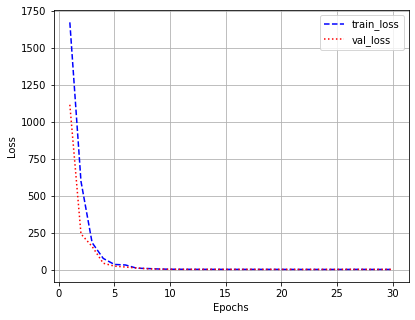

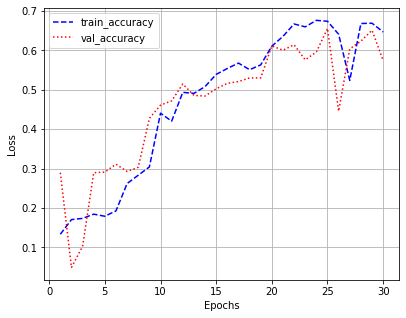

In [64]:
plot_history(history.history)

In [65]:
model.evaluate(test_x, test_y)

26/26 [==============================] - 1s 23ms/step - loss: 1.4815 - acc: 0.5606


[1.4815272092819214, 0.5605875253677368]

## CNN

In [66]:
from keras.utils import to_categorical

cqt_np = np.array(audio_stft, np.float32)

cqt_array = np.expand_dims(cqt_np, -1)
inst_cat = to_categorical(rabel_np)

train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)

(3264, 513, 87, 1)
(817, 513, 87, 1)
(3264, 20)


In [67]:
from keras.layers import Conv2D, MaxPool2D, Flatten

def model_build():
  model = Sequential()

  input = Input(shape=(513, 87, 1))

  output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(input)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(256, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(512, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Flatten()(output)
  output = Dense(512, activation='relu')(output)
  output = Dense(256, activation='relu')(output)
  output = Dense(128, activation='relu')(output)

  output = Dense(20, activation='softmax')(output)

  model = Model(inputs =[input], outputs=output) 

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])
  return model

In [68]:
model = model_build()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 513, 87, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 513, 87, 128)      1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 257, 44, 128)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 257, 44, 256)      295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 129, 22, 256)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 129, 22, 512)      1180

In [69]:
history = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20


2022-07-20 23:17:16.965338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


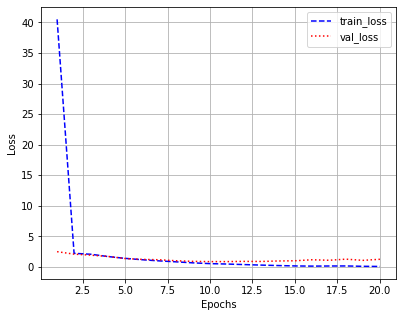

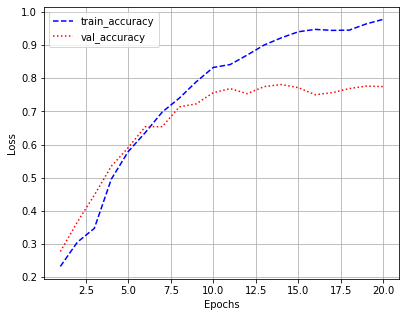

In [ ]:
plot_history(history.history)

In [96]:
model.evaluate(test_x, test_y)

26/26 [==============================] - 28s 1s/step - loss: 1.0554 - acc: 0.7956


[1.0554494857788086, 0.7955936193466187]

## MFCC

In [16]:
audio_mfcc = []
for y in audio_np:
    ret = librosa.feature.mfcc(y=y, sr=sr)
    audio_mfcc.append(ret)


In [17]:
mfcc_np = np.array(audio_mfcc, np.float32)


print(mfcc_np.shape, rabel_np.shape)

(4081, 20, 87) (4081,)


In [18]:
mfcc_np = mfcc_np.reshape(4081, 20 * 87)

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(mfcc_np)

MinMaxScaler()

In [20]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(mfcc_np, rabel_np, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape) 


(3264, 1740)
(817, 1740)
(3264,)
(817,)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.6940024479804161


In [22]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred =SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.7013463892288861


In [23]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.5361077111383109


## DNN + mfcc

In [24]:
from keras.utils import to_categorical

cqt_np = np.array(audio_mfcc, np.float32)
cqt_np = cqt_np.reshape(4081, 20 * 87)
cqt_array = np.expand_dims(cqt_np, -1)
inst_cat = to_categorical(rabel_np)

train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(3264, 1740, 1)
(817, 1740, 1)
(3264, 20)
(817, 20)


In [25]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

def model_build():
  model = Sequential()

  input = Input(shape=(1740,), name='input')
  output = Dense(512, activation='relu', name='hidden1')(input)
  output = Dense(256, activation='relu', name='hidden2')(output)
  output = Dense(128, activation='relu', name='hidden3')(output)
  output = Dense(20, activation='softmax', name='output')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=['acc'])
  return model


In [26]:
model = model_build()
model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1740)]            0         
                                                                 
 hidden1 (Dense)             (None, 512)               891392    
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 output (Dense)              (None, 20)                2580      
                                                                 
Total params: 1,058,196
Trainable params: 1,058,196
Non-trainable params: 0
________________________________________

2022-07-20 23:59:47.537756: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-20 23:59:47.538253: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [27]:
history = model.fit(train_x, train_y, epochs=30, batch_size = 128, validation_split=0.2)

Epoch 1/30


2022-07-20 23:59:48.958177: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/21 [>.............................] - ETA: 7s - loss: 92.8175 - acc: 0.2422

2022-07-20 23:59:49.184901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 21ms/step - loss: 28.0685 - acc: 0.4133 - val_loss: 7.4989 - val_acc: 0.4977
Epoch 2/30
 7/21 [=========>....................] - ETA: 0s - loss: 5.2357 - acc: 0.5804

2022-07-20 23:59:49.670184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 0s 14ms/step - loss: 4.2461 - acc: 0.6059 - val_loss: 3.7983 - val_acc: 0.5896
Epoch 3/30
21/21 [==============================] - 0s 12ms/step - loss: 1.8876 - acc: 0.6836 - val_loss: 2.5104 - val_acc: 0.6340
Epoch 4/30
21/21 [==============================] - 0s 12ms/step - loss: 1.1368 - acc: 0.7488 - val_loss: 2.2063 - val_acc: 0.6524
Epoch 5/30
21/21 [==============================] - 0s 12ms/step - loss: 0.6869 - acc: 0.8219 - val_loss: 1.8946 - val_acc: 0.7060
Epoch 6/30
21/21 [==============================] - 0s 12ms/step - loss: 0.5217 - acc: 0.8591 - val_loss: 1.9952 - val_acc: 0.6830
Epoch 7/30
21/21 [==============================] - 0s 15ms/step - loss: 0.4138 - acc: 0.8705 - val_loss: 1.9651 - val_acc: 0.6478
Epoch 8/30
21/21 [==============================] - 0s 12ms/step - loss: 0.3786 - acc: 0.8824 - val_loss: 1.8932 - val_acc: 0.6907
Epoch 9/30
21/21 [==============================] - 0s 12ms/step - loss: 0.2848 - acc: 0.9123 

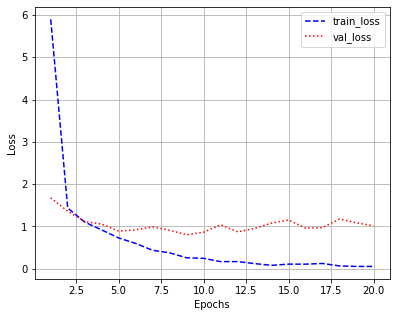

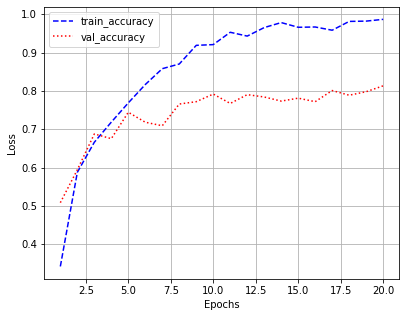

In [73]:
plot_history(history.history)

In [74]:
model.evaluate(test_x, test_y)

26/26 [==============================] - 1s 20ms/step - loss: 0.9999 - acc: 0.8250


[0.9998646974563599, 0.8249694108963013]

In [32]:
model.save('MFCC_DNN_Model.h5')

# 여기서부터 모델 만들기 

## CNN + mfcc

In [60]:
audio_mfcc = []
for y in audio:
  ret = librosa.feature.mfcc(y=y, sr=sr)
  audio_mfcc.append(ret)

In [61]:
mfcc_np = np.array(audio_mfcc, np.float32)
label_np = np.array(label, np.int16)

print(mfcc_np.shape, label_np.shape)

(4081, 20, 87) (4081,)


In [63]:
mfcc_np = mfcc_np.reshape((4081, 20*87))

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(mfcc_np)

MinMaxScaler()

In [69]:
from keras.utils import to_categorical

mfcc_np = mfcc_np.reshape((4081, 20, 87))
mfcc_array = np.expand_dims(mfcc_np, -1)
inst_cat = to_categorical(label_np)

train_x, test_x, train_y, test_y = train_test_split(mfcc_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)


(3264, 20, 87, 1)
(817, 20, 87, 1)
(3264, 20)


In [70]:
from keras.layers import Conv2D, MaxPool2D, Flatten

def model_build():
  model = Sequential()

  input = Input(shape=(20, 87, 1))

  output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(input)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(256, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(512, 3, strides=1, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Flatten()(output)
  output = Dense(512, activation='relu')(output)
  output = Dense(256, activation='relu')(output)
  output = Dense(128, activation='relu')(output)

  output = Dense(20, activation='softmax')(output)

  model = Model(inputs =[input], outputs=output) 

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['acc'])
  return model

In [71]:
model = model_build()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20, 87, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 87, 128)       1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 44, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 44, 256)       295168    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 22, 256)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 5, 22, 512)        1180

In [72]:
history = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20


2022-07-21 21:43:54.489667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - ETA: 0s - loss: 5.8968 - acc: 0.3420

2022-07-21 21:43:59.433572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 6s 238ms/step - loss: 5.8968 - acc: 0.3420 - val_loss: 1.6735 - val_acc: 0.5084
Epoch 2/20
21/21 [==============================] - 5s 224ms/step - loss: 1.4337 - acc: 0.5875 - val_loss: 1.3577 - val_acc: 0.5942
Epoch 3/20
21/21 [==============================] - 5s 230ms/step - loss: 1.1007 - acc: 0.6660 - val_loss: 1.1143 - val_acc: 0.6876
Epoch 4/20
21/21 [==============================] - 5s 229ms/step - loss: 0.9156 - acc: 0.7185 - val_loss: 1.0542 - val_acc: 0.6753
Epoch 5/20
21/21 [==============================] - 5s 230ms/step - loss: 0.7251 - acc: 0.7687 - val_loss: 0.8854 - val_acc: 0.7443
Epoch 6/20
21/21 [==============================] - 5s 226ms/step - loss: 0.5966 - acc: 0.8165 - val_loss: 0.9175 - val_acc: 0.7182
Epoch 7/20
21/21 [==============================] - 5s 224ms/step - loss: 0.4336 - acc: 0.8579 - val_loss: 0.9877 - val_acc: 0.7090
Epoch 8/20
21/21 [==============================] - 5s 229ms/step - loss: 0.3741 - acc:

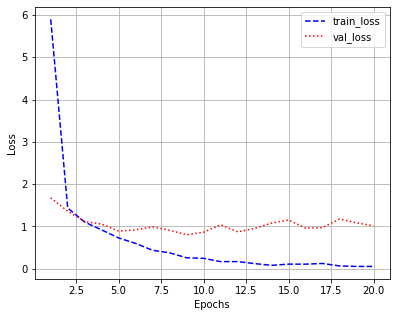

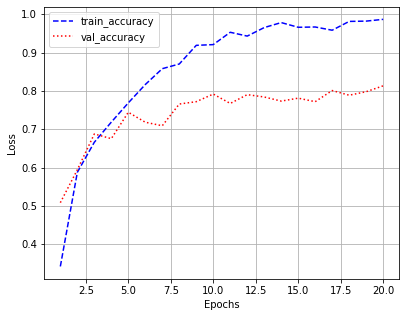

In [75]:
plot_history(history.history)

In [76]:
model.evaluate(test_x, test_y)

26/26 [==============================] - 1s 19ms/step - loss: 0.9999 - acc: 0.8250


[0.9998646974563599, 0.8249694108963013]

In [77]:
model.save('MFCC_CNN_Model.h5')

----------

In [113]:
file_path = './Sound_dataset/cat/cat_1.wav'
test_y, test_sr = librosa.load(file_path, sr=20400, duration=2.0) 
S = librosa.core.stft(test_y, n_fft=1024, hop_length=512, win_length=1024)
D = np.abs(S)**2
log_S = librosa.power_to_db(S, ref=np.max)
test_np = np.array(log_S, np.float32)
print(test_np.shape)
# test_np = test_np.reshape(377, 513 * 80)

scaler = MinMaxScaler()
scaler.fit(test_np)


(513, 80)


MinMaxScaler()

In [114]:
len(model.predict(test_x))

26/26 [==============================] - 2s 47ms/step


817

In [112]:
movie = './Audio Dataset_join 2sec/airplane/1-11687-A-47.wav'
y,sr = librosa.load(movie, sr=96000, duration=2.0)
audio = []
audio.append(y)
audio_np = np.array(audio, np.float64)
print( audio_np.shape )

movie_mfcc = librosa.feature.mfcc(audio_np, sr=sr)
mfcc_np = np.array(movie_mfcc, np.float32)
print(mfcc_np.shape)
# model.predict(movie)

(1, 192000)
(1, 20, 376)


In [110]:
movie = './movie_trim_test/50.wav'
y,sr = librosa.load(movie, sr=96000, duration=2.0)
audio = []
audio.append(y)
audio_np = np.array(audio, np.float64)
print( audio_np.shape )

movie_mfcc = librosa.feature.mfcc(audio_np, sr=sr)
mfcc_np = np.array(movie_mfcc, np.float32)
print(mfcc_np.shape)
# model.predict(movie)

(1, 192001)
(1, 20, 376)


## 영화 사운드 데이터 적용

In [40]:
movie = './movie2_cut1_rain.wav'
y,sr = librosa.load(movie, sr=96000, duration=2.0)
audio = []
audio.append(y)
audio_np = np.array(audio, np.float64)
print( audio_np.shape )

movie_mfcc = librosa.feature.mfcc(audio_np, sr=sr)
mfcc_np = np.array(movie_mfcc, np.float32)
print(mfcc_np.shape)
# model.predict(movie)

(1, 192001)
(1, 20, 376)


In [ ]:
# tmp = np.argmax(model.predict(mfcc_np))
# print(tmp)

In [43]:
model.predict(test_x)

26/26 [==============================] - 1s 21ms/step


array([[4.02905107e-06, 2.97672069e-03, 1.05419965e-03, ...,
        8.10937374e-04, 3.47061672e-07, 5.36430278e-08],
       [2.25111393e-13, 8.63234560e-13, 9.99821007e-01, ...,
        7.50699625e-16, 1.20927574e-13, 6.36171801e-12],
       [2.81614963e-17, 2.01510293e-12, 3.19908103e-21, ...,
        7.55156554e-16, 1.30434418e-16, 2.68499693e-20],
       ...,
       [3.34650820e-27, 1.31439496e-18, 7.81697623e-12, ...,
        1.94984710e-18, 1.24339804e-17, 1.29181172e-23],
       [1.52658700e-07, 1.76408088e-09, 1.59711621e-04, ...,
        1.69942144e-10, 1.19142932e-07, 5.96849031e-06],
       [4.62459684e-05, 2.21178798e-05, 9.81276274e-01, ...,
        4.72312377e-06, 3.68384235e-07, 7.52075016e-03]], dtype=float32)

In [42]:
check = []

for i in range(len(class_list)):
    check.append([])

for i in range(len(model.predict(test_x))):
    tmp = np.argmax(model.predict(test_x)[i])
    check[tmp].append(1)

 5/26 [====>.........................] - ETA: 0s

2022-07-21 09:26:13.670153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 1s 19ms/step


In [44]:
a = 0
for i in check:
    print(len(i), class_list[a])
    a += 1

7 airplane
6 bell
98 car_horn
53 cat
27 chirping_birds
5 clapping
5 crying_baby
230 dog_bark
2 drum
26 guitar
98 gun_shot
11 laughing
6 lion
4 piano
3 rain
8 scream
215 siren
1 snoring
8 thunderstorm
4 vacuum_cleaner


In [63]:
test_y[:5]

array([ 0.00381674,  0.00391974,  0.00119769, -0.00010152, -0.00092126],
      dtype=float32)

----------

In [18]:
class_list_test = ['rain'] 

audio_duration_test = []
audio_test = []
label_test = []


for i in range (len(class_list_test)):
    audio_duration_test.append([])

try:
    for i in range(len(class_list)):
        dir_path = './' 
        dir_path = dir_path + class_list[i]

        for (root, directories, files) in os.walk(dir_path):
            for file in files:
                if '.wav' in file or '.mp3' in file:
                    file_path = os.path.join(root, file)
                    y, sr = librosa.load(file_path, duration=2) 
                    # y = librosa.resample(y, sr, )
                    duration = librosa.get_duration(y, sr=sr)
                    audio_duration[i].append(duration)
                    audio.append(y)
                    label.append(i)
except:
    print(file_path)

print(len(audio))

[array([ 0.0000000e+00, -3.0517578e-05,  0.0000000e+00, ...,
        1.0986328e-03,  6.4086914e-04,  1.8310547e-04], dtype=float32), array([-0.01251221, -0.02316284, -0.02981567, ...,  0.00613403,
        0.00454712,  0.0027771 ], dtype=float32)]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:

audio_np_test = np.array(audio_test, np.float64)


print( audio_np_test.shape )

(26, 44100)


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(audio_np_test)

MinMaxScaler()

In [21]:
print(audio_np_test.shape)

(26, 44100)


In [28]:
print(test_x.shape)

(817, 44100)


In [34]:
## 단순 logistic pred
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)


pred = LR.predict(audio_np_test)
print(pred)\

time = 0
for i in pred:
    print(time, time+2 , class_list[i])
    time +=2
  

[16 16  7 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16  7]
0 2 siren
2 4 siren
4 6 dog_bark
6 8 siren
8 10 siren
10 12 siren
12 14 siren
14 16 siren
16 18 siren
18 20 siren
20 22 siren
22 24 siren
24 26 siren
26 28 siren
28 30 siren
30 32 siren
32 34 siren
34 36 siren
36 38 siren
38 40 siren
40 42 siren
42 44 siren
44 46 siren
46 48 siren
48 50 siren
50 52 dog_bark


In [22]:
## 단순 svm pred
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(audio_np_test)
print(pred)

time = 0
for i in pred:
    print(time, time+2 , class_list[i])
    time +=2
  

[16 16  7  9  7 16  7 16 16 16 16 16 16 16 16 16  9  2 16 16  9  7  7 16
  7 16]
0 2 siren
2 4 siren
4 6 dog_bark
6 8 guitar
8 10 dog_bark
10 12 siren
12 14 dog_bark
14 16 siren
16 18 siren
18 20 siren
20 22 siren
22 24 siren
24 26 siren
26 28 siren
28 30 siren
30 32 siren
32 34 guitar
34 36 car_horn
36 38 siren
38 40 siren
40 42 guitar
42 44 dog_bark
44 46 dog_bark
46 48 siren
48 50 dog_bark
50 52 siren


In [24]:
proba = DT.predict_proba(audio_np_test)
# print(proba)
print(np.round(proba, decimals=4))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.

In [31]:
print(audio_np_test)

[[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ...  1.09863281e-03
   6.40869141e-04  1.83105469e-04]
 [-1.25122070e-02 -2.31628418e-02 -2.98156738e-02 ...  6.13403320e-03
   4.54711914e-03  2.77709961e-03]
 [ 2.86865234e-03  2.25830078e-03 -1.98364258e-03 ... -3.24096680e-02
  -3.03649902e-02 -2.76794434e-02]
 ...
 [ 9.15527344e-05  9.15527344e-05  9.15527344e-05 ... -1.49536133e-03
   1.52587891e-03  6.07299805e-03]
 [ 4.88281250e-04  5.34057617e-03  8.94165039e-03 ... -5.06591797e-03
  -6.74438477e-03 -7.87353516e-03]
 [-1.19628906e-02 -1.84631348e-02 -2.55432129e-02 ...  1.15051270e-02
   5.46264648e-03 -2.59399414e-03]]


In [37]:
audio_stft_test = []
for y in audio_np_test:
  S = librosa.core.stft(y, n_fft=1024, hop_length=512, win_length=1024)
  D = np.abs(S)**2
  log_S = librosa.power_to_db(S, ref=np.max)
  audio_stft_test.append(log_S)

In [38]:
print(audio_stft_test)

[array([[-10.71741886,  -5.7629089 ,  -5.82437562, ..., -18.60754245,
        -20.09807402, -13.92607687],
       [-11.36775497,  -8.66150493,  -8.83308924, ..., -11.6232589 ,
        -12.98238661, -11.94858372],
       [-13.40608402, -31.77453037, -25.87896841, ...,  -9.91981915,
         -6.8683148 , -10.56173249],
       ...,
       [-41.19143708, -44.89461396, -37.7354333 , ..., -37.25989453,
        -34.75385113, -34.6616387 ],
       [-47.72197966, -41.74496056, -42.20130913, ..., -37.8270745 ,
        -36.0894059 , -37.2941693 ],
       [-56.80816143, -41.52655983, -46.75855536, ..., -42.88092797,
        -37.98113716, -38.38761364]]), array([[-12.86484639, -20.32242104, -17.58996475, ...,  -7.39345625,
         -7.30984533,  -4.24797504],
       [-12.20608982, -19.82931585, -19.57925084, ...,  -5.20407851,
         -6.31371972,  -5.06609557],
       [-10.60744028, -20.91494648, -16.69097653, ...,  -7.19068337,
         -7.63104172,  -9.58985205],
       ...,
       [-32.7139772

In [41]:
stft_np_test = np.array(audio_stft_test, np.float32)

print(stft_np_test.shape)

(26, 513, 87)


In [42]:
stft_np_test = stft_np_test.reshape(26, 513 * 87)

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(stft_np_test)

MinMaxScaler()

In [48]:
## stft logistic pred
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)


pred = LR.predict(stft_np_test)
print(pred)

time = 0
for i in pred:
    print(time, time+2 , class_list[i])
    time +=2

[16 16  7  9 18  7  7  3 10 10 10  9  9  7  9  3  7  3  7  7  7  7  7  9
  2  2]
0 2 siren
2 4 siren
4 6 dog_bark
6 8 guitar
8 10 thunderstorm
10 12 dog_bark
12 14 dog_bark
14 16 cat
16 18 gun_shot
18 20 gun_shot
20 22 gun_shot
22 24 guitar
24 26 guitar
26 28 dog_bark
28 30 guitar
30 32 cat
32 34 dog_bark
34 36 cat
36 38 dog_bark
38 40 dog_bark
40 42 dog_bark
42 44 dog_bark
44 46 dog_bark
46 48 guitar
48 50 car_horn
50 52 car_horn


In [65]:
proba = LR.predict_proba(stft_np_test)
# print(np.round(proba, decimals=4))
cnt = 0
for i in proba:
    if max(i) > 0.7:
        print(cnt, max(i), class_list[pred[cnt]])
    cnt+=1

5 0.942022556455458 chirping_birds
7 0.8434630234174921 siren
11 0.9982912377769683 dog_bark
12 0.8119182436828152 lion
15 0.7463043769199327 gun_shot
16 0.9664757675239856 dog_bark
21 0.8562596080158286 dog_bark
22 0.7717054296481921 dog_bark
23 0.9020646448744046 cat


In [66]:
# stft svm pred
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x, train_y)
pred =SVM.predict(stft_np_test)
print(pred)

time = 0
for i in pred:
    print(time, time+2 , class_list[i])
    time +=2


[ 7 10 10  7  2  7  7  3 10 10 10  9  2  7 16 16  7  7  7  7  7  7  7  7
  2  2]
0 2 dog_bark
2 4 gun_shot
4 6 gun_shot
6 8 dog_bark
8 10 car_horn
10 12 dog_bark
12 14 dog_bark
14 16 cat
16 18 gun_shot
18 20 gun_shot
20 22 gun_shot
22 24 guitar
24 26 car_horn
26 28 dog_bark
28 30 siren
30 32 siren
32 34 dog_bark
34 36 dog_bark
36 38 dog_bark
38 40 dog_bark
40 42 dog_bark
42 44 dog_bark
44 46 dog_bark
46 48 dog_bark
48 50 car_horn
50 52 car_horn


In [67]:
proba = SVM.predict_proba(stft_np_test)
# print(np.round(proba, decimals=4))
cnt = 0
for i in proba:
    if max(i) > 0.7:
        print(cnt, max(i), class_list[pred[cnt]])
    cnt+=1

AttributeError: predict_proba is not available when  probability=False

In [68]:
# stft svm pred
from sklearn import svm


DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred =DT.predict(stft_np_test)
print(pred)

time = 0
for i in pred:
    print(time, time+2 , class_list[i])
    time +=2

[ 2  0  7 17  7  3  2  3  8  8  8 16  6  6  2  2  6  7 11  7  7 16  7 16
  7 10]
0 2 car_horn
2 4 airplane
4 6 dog_bark
6 8 snoring
8 10 dog_bark
10 12 cat
12 14 car_horn
14 16 cat
16 18 drum
18 20 drum
20 22 drum
22 24 siren
24 26 crying_baby
26 28 crying_baby
28 30 car_horn
30 32 car_horn
32 34 crying_baby
34 36 dog_bark
36 38 laughing
38 40 dog_bark
40 42 dog_bark
42 44 siren
44 46 dog_bark
46 48 siren
48 50 dog_bark
50 52 gun_shot


In [69]:
proba = DT.predict_proba(stft_np_test)
# print(np.round(proba, decimals=4))
cnt = 0
for i in proba:
    if max(i) > 0.7:
        print(cnt, max(i), class_list[pred[cnt]])
    cnt+=1

0 1.0 car_horn
1 1.0 airplane
2 1.0 dog_bark
3 1.0 snoring
4 1.0 dog_bark
5 1.0 cat
6 1.0 car_horn
7 1.0 cat
8 1.0 drum
9 1.0 drum
10 1.0 drum
11 1.0 siren
12 1.0 crying_baby
13 1.0 crying_baby
14 1.0 car_horn
15 1.0 car_horn
16 1.0 crying_baby
17 1.0 dog_bark
18 1.0 laughing
19 1.0 dog_bark
20 1.0 dog_bark
21 1.0 siren
22 1.0 dog_bark
23 1.0 siren
24 1.0 dog_bark
25 1.0 gun_shot


# DNN pred

In [72]:
print(stft_np_test.shape)

(26, 44631)


In [75]:
from keras.utils import to_categorical

stft_np_test = np.array(audio_stft_test, np.float32)
stft_np_test = stft_np_test.reshape(26, 513 * 87) # 변경
cqt_array = np.expand_dims(stft_np_test, -1)
stft_np_test = cqt_array
print(stft_np_test.shape)

(26, 44631, 1)


In [89]:
predictions = model.predict(stft_np_test)
for i in predictions:
    if max(i) > 0.4:
        print(class_list[np.argmax(i)], max(i))



1/1 [==============================] - 0s 31ms/step
guitar 0.9273065
guitar 0.669264
guitar 0.5541399
guitar 0.44308737
scream 0.43440327
laughing 0.5601789
dog_bark 0.52439904
dog_bark 0.42404327
dog_bark 0.48054412
guitar 0.4970056


## CNN pred

In [91]:
from keras.utils import to_categorical

cqt_np_test = np.array(audio_stft_test, np.float32)

cqt_array_test = np.expand_dims(cqt_np_test, -1)
cqt_np_test = cqt_array_test
print(cqt_np_test.shape)

(26, 513, 87, 1)


In [98]:
predictions = model.predict(cqt_np_test)
for i in predictions:
    if max(i) > 0.8:
        print(class_list[np.argmax(i)], max(i))

1/1 [==============================] - 1s 897ms/step
laughing 0.9361831
gun_shot 0.99279743
dog_bark 0.8299342
snoring 0.8945373
gun_shot 0.9725342
gun_shot 0.9725342
gun_shot 0.9725342
dog_bark 0.815653
dog_bark 0.9623479
car_horn 0.9913577
dog_bark 0.9991027
dog_bark 0.9997271
dog_bark 0.9378661
dog_bark 0.9803539
dog_bark 0.9333372
car_horn 0.95198876


In [100]:
audio_mfcc_test = []
for y in audio_np_test:
    ret = librosa.feature.mfcc(y=y, sr=sr)
    audio_mfcc_test.append(ret)

In [103]:
mfcc_np_test = np.array(audio_mfcc_test, np.float32)


print(mfcc_np_test.shape)

(26, 20, 87)


In [105]:
mfcc_np_test = mfcc_np_test.reshape(26, 20 * 87) # 값을 바꿔줘야함

In [111]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(mfcc_np_test)

MinMaxScaler()

In [112]:
## stft logistic pred
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)


pred = LR.predict(mfcc_np_test)
print(pred)

time = 0
for i in pred:
    print(time, time+2 , class_list[i])
    time +=2

[16 16  7  7  7  7 16  3  3  3  3  7 16  7 16  3  7 16  7 16  7  7  3 16
  2 16]
0 2 siren
2 4 siren
4 6 dog_bark
6 8 dog_bark
8 10 dog_bark
10 12 dog_bark
12 14 siren
14 16 cat
16 18 cat
18 20 cat
20 22 cat
22 24 dog_bark
24 26 siren
26 28 dog_bark
28 30 siren
30 32 cat
32 34 dog_bark
34 36 siren
36 38 dog_bark
38 40 siren
40 42 dog_bark
42 44 dog_bark
44 46 cat
46 48 siren
48 50 car_horn
50 52 siren


## DNN + mfcc

In [115]:
print(np.array(audio_mfcc_test, np.float32).shape)

(26, 20, 87)


In [116]:
from keras.utils import to_categorical

cqt_np_test = np.array(audio_mfcc_test, np.float32)
cqt_np_test = cqt_np_test.reshape(26, 20 * 87) # 바꿔줘야함
cqt_array_test = np.expand_dims(cqt_np_test, -1)
cqt_np_test = cqt_array_test

print(cqt_array_test.shape)

(26, 1740, 1)


In [121]:
predictions = model.predict(cqt_np_test)
for i in predictions:
    if max(i) > 0.8:
        print(class_list[np.argmax(i)], max(i))

1/1 [==============================] - 0s 36ms/step
drum 0.8178288
guitar 0.9268214
dog_bark 1.0
siren 0.96170527
siren 0.9998091
siren 0.99999905
siren 0.99999905
siren 0.99999905
siren 0.9953295
chirping_birds 0.8102557
siren 0.98543316
siren 0.9951133
siren 0.9925518
dog_bark 0.98844224
siren 0.9719577
dog_bark 0.9995167
dog_bark 0.8887179
dog_bark 0.99982613
siren 0.9804185
snoring 0.9782819
dog_bark 0.99464947


## CNN + mfcc

In [123]:
from keras.utils import to_categorical

cqt_np_test = np.array(audio_mfcc_test, np.float32)

cqt_array_test = np.expand_dims(cqt_np_test, -1)
cqt_np_test = cqt_array_test

print(cqt_np_test.shape)

(26, 20, 87, 1)


In [130]:
predictions = model.predict(cqt_np_test)
cnt = 0
for i in predictions:
    if max(i) > 0.8:
        print(cnt,'~', (cnt+2), class_list[np.argmax(i)], max(i))
    cnt += 2

1/1 [==============================] - 0s 45ms/step
0 ~ 2 siren 0.94630855
6 ~ 8 dog_bark 0.9368573
10 ~ 12 dog_bark 0.961047
12 ~ 14 siren 0.975091
14 ~ 16 cat 0.86434937
22 ~ 24 guitar 0.8408569
24 ~ 26 cat 0.8298624
26 ~ 28 chirping_birds 0.9149699
30 ~ 32 cat 0.9998441
32 ~ 34 dog_bark 0.9992011
34 ~ 36 siren 0.9970848
36 ~ 38 dog_bark 0.99541277
38 ~ 40 dog_bark 0.8750079
42 ~ 44 dog_bark 0.86632013
44 ~ 46 dog_bark 0.9213655


In [131]:
model.save('CNN + MFCC sr = 20400.h5')

In [132]:
from tensorflow.keras.models import load_model
model = load_model('CNN + MFCC sr = 20400.h5')

In [133]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20, 87, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 87, 128)       1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 44, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 44, 256)       295168    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 22, 256)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 22, 512)        1180

In [137]:
predictions = model.predict(cqt_np_test)
cnt = 0
result = []
for i in predictions:
    if max(i) > 0.8:
        tmp = '{} ~ {} {} {}'.format(cnt,(cnt+2), class_list[np.argmax(i)], max(i))
        print(tmp)
        result.append(tmp)
    cnt += 2

1/1 [==============================] - 0s 46ms/step
0 ~ 2 siren 0.9463085532188416
6 ~ 8 dog_bark 0.936857283115387
10 ~ 12 dog_bark 0.9610469937324524
12 ~ 14 siren 0.9750909805297852
14 ~ 16 cat 0.864349365234375
22 ~ 24 guitar 0.8408569097518921
24 ~ 26 cat 0.8298624157905579
26 ~ 28 chirping_birds 0.9149699211120605
30 ~ 32 cat 0.9998440742492676
32 ~ 34 dog_bark 0.9992011189460754
34 ~ 36 siren 0.9970847964286804
36 ~ 38 dog_bark 0.9954127669334412
38 ~ 40 dog_bark 0.8750079274177551
42 ~ 44 dog_bark 0.8663201332092285
44 ~ 46 dog_bark 0.92136549949646


In [145]:
tmp1 = str.split(result[0])
print(tmp1)

['0', '~', '2', 'siren', '0.9463085532188416']


In [155]:
import pandas as pd

movie_sound = pd.DataFrame(
    [[tmp1[0],tmp1[2],tmp1[3],tmp1[4]]],

    columns=['start','end','label','pred']
                           )
print(movie_sound)

  start end  label                pred
0     0   2  siren  0.9463085532188416


In [162]:
cnt = 0
for i in result:
    tmp1 = str.split(i)
    if cnt == 0:
        movie_sound = pd.DataFrame(
            [[tmp1[0],tmp1[2],tmp1[3],tmp1[4]]],
            index=[cnt],
            columns=['start','end','label','pred']
                            )
    
    else:
        movie_sound2 = pd.DataFrame(
            [[tmp1[0],tmp1[2],tmp1[3],tmp1[4]]],
            index=[cnt],
            columns=['start','end','label','pred']
                            )
        movie_sound = pd.concat([movie_sound,movie_sound2])
        
    cnt += 1

print(movie_sound)
    
    

   start end           label                pred
0      0   2           siren  0.9463085532188416
1      6   8        dog_bark   0.936857283115387
2     10  12        dog_bark  0.9610469937324524
3     12  14           siren  0.9750909805297852
4     14  16             cat   0.864349365234375
5     22  24          guitar  0.8408569097518921
6     24  26             cat  0.8298624157905579
7     26  28  chirping_birds  0.9149699211120605
8     30  32             cat  0.9998440742492676
9     32  34        dog_bark  0.9992011189460754
10    34  36           siren  0.9970847964286804
11    36  38        dog_bark  0.9954127669334412
12    38  40        dog_bark  0.8750079274177551
13    42  44        dog_bark  0.8663201332092285
14    44  46        dog_bark    0.92136549949646
